# Assignments Week VI.<br><br>Discrete-time Fourier Transform and Discrete Fourier Transform
<hr style="height:1px; border:none; background-color:blue;">

### Useful Information

**In this notebook you will be working on the mandatory assignments for week six of Signal Processing**. In order to complete the notebook you must complete all of the necessary code blocks (labelled with "Write your code here"), and fill in all answer blocks. Each section of the notebook will state the completion criteria, which summarize everything you need to do to complete that section. **If you are stuck on a section in this notebook, it may be beneficial to check the non-mandatory exercises for this week, since they may have content that can help you!**

Mandatory assignments are pass or fail. **If your notebook is incomplete - meaning you did not complete the task required or answer the necessary questions - then you will automatically fail.** So once you finish this notebook, please look through it to make sure you've answered everything!

<hr style="height:1px; border:none; background-color:blue;">

### Objectives

- Understand and interpret DFT results and spectra computed by using DFTs.
- Create signals in the DFT domain.
- Convert between digital radian frequency to actual frequency in Hz.

<hr style="height:3px; border:none; background-color:blue;">

<h3 style="color:blue;"> <u>Imports for Exercises and Assignments </u></h3> 

Run the code below to import modules that will be used throughout the rest of this notebook.

<br>

In [2]:
##########################################################################################
# Import various modules into PYTHON. These will be used throughput this Jupyter Notebook
##########################################################################################
# import matplotlib for data visualisation
import matplotlib.pyplot as plt

# import NumPy for better matrix support
import numpy as np

# import Pickle for data serialisation
import pickle as pkl

# import wav for reading files
from scipy.io import wavfile as wv

# import audio for playing audio
from IPython.display import Audio, display

# add path for importing modules to './data'. 
import sys
sys.path.insert(0, './data')

#######################################################################################
#
# function for easy plotting of signals with centered axis and larger figure
#
#   nicesignalplot(scale,values,caption)
#      scale:   array with vertical scale values 't' (float)
#      values:  array with signal values 'x(t)' to plot (float or complex, 
#               in latter case .real will be used)
#      caption: caption of the plot (string)
#
######################################################################################
def nicesignalplot(scale,values,caption):
    myfigure  =  plt.figure(figsize=(15,7.5))
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot( scale, values)
    plt.title('(nicesignalplot): '+caption)
    plt.show()

###########################################################################################
#
# function for easy plotting of DFT magnitude spectrum with centered axis and larger figure
#
#      nicemagspecplot(N,dftvalues,caption,hvsize)
#      N:          number of samples in x[n] and X[k], is equal to the applied DFT length
#      dftvalues:  array with complex-valued DFT coefficient X[k].
#      caption: caption of the plot (string)
#      hvsize = [hsize,vsize]: array with horizontal width and vertical height of plot. 
#                              Try hvsize = [7,4]
#
##########################################################################################
def nicemagspecplot(N,dftvalues,caption,hvsize,ylabel='$|X(\hat{\omega})|$'):
    myfigure  = plt.figure(figsize=hvsize)
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.stem(np.arange(N) * (2 * np.pi / N), np.abs(dftvalues))
    plt.title('(nicemagspecplot): '+caption)
    plt.xlabel('$\hat{\omega}$',fontsize=16,horizontalalignment='right',x=0.95)
    plt.ylabel(ylabel,fontsize=16,horizontalalignment='right',y=0.95)
    plt.show()
    
########################################################################################
#
# function for easy plotting of DFT phase spectrum with centered axis and larger figure
#
#      nicephasespecplot(N,dftvalues,caption,hvsize)
#      N:          number of samples in x[n] and X[k], is equal to the applied DFT length
#      dftvalues:  array with complex-valued DFT coefficient X[k].
#      caption:    caption of the plot (string)
#      hvsize = [hsize,vsize]: array with horizontal width and vertical height of plot. 
#                              Try hvsize = [7,4]
#
#########################################################################################
def nicephasespecplot(N,dftvalues,caption,hvsize,ylabel='arg$(X(\hat{\omega}))$'):
    myfigure  = plt.figure(figsize=hvsize)
    ax        = myfigure.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    ax.stem(np.arange(N) * (2 * np.pi / N), np.angle(dftvalues))
    plt.title('(nicephasespecplot): '+caption)
    plt.xlabel('$\hat{\omega}$',fontsize=16,horizontalalignment='right',x=0.95)
    plt.ylabel(ylabel,fontsize=16,horizontalalignment='right',y=0.95)
    plt.show()

<>:63: SyntaxWarning: invalid escape sequence '\h'
<>:78: SyntaxWarning: invalid escape sequence '\h'
<>:94: SyntaxWarning: invalid escape sequence '\h'
<>:109: SyntaxWarning: invalid escape sequence '\h'
<>:63: SyntaxWarning: invalid escape sequence '\h'
<>:78: SyntaxWarning: invalid escape sequence '\h'
<>:94: SyntaxWarning: invalid escape sequence '\h'
<>:109: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_37953/3007307208.py:63: SyntaxWarning: invalid escape sequence '\h'
  def nicemagspecplot(N,dftvalues,caption,hvsize,ylabel='$|X(\hat{\omega})|$'):
/tmp/ipykernel_37953/3007307208.py:78: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('$\hat{\omega}$',fontsize=16,horizontalalignment='right',x=0.95)
/tmp/ipykernel_37953/3007307208.py:94: SyntaxWarning: invalid escape sequence '\h'
  def nicephasespecplot(N,dftvalues,caption,hvsize,ylabel='arg$(X(\hat{\omega}))$'):
/tmp/ipykernel_37953/3007307208.py:109: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT VI.1 ---------------------------------------------------------------------->

<h3 style="color:blue;"> <u>Python Hands-on Assignment VI.1: Phase of the spectrum</u></h3>  
    
<br>
<div style="background-color:#c2eafa">
<br>
<b>Completion requirements for this assignment.</b>
<ul>
<li>Explain the similarities and differences between your spectrum plots and the referred spectra of the class lecture.</li>
<li>Explain how you verified complex conjugate symmetry of the spectrum.</li>
<li>Explain your choice for the value of $y[0]$, and similarities and differences  of the resulting magnitude and phase spectra.</li>
<li>Show and explain the effects of delaying a signal over a number of samples on the resulting magnitude and phase spectra.</li>
<li>Show and explain the effects of left-shifting $x[n]$ over 1 sample.</li>
</ul>
<hr>
</div>

In this assignment we focus on the phase of a signal's spectrum. We consider the DFT of the signal $x[n] = \delta[n] + \delta[n-1] + \delta[n-2]$ and variations of the signal. **Make sure to plot digital radian frequencies on the horizontal axis rather than index numbers of the DFT coefficients.**

**Generate the above signal $x[n]$ in a vector of length 128 and plot $x[n]$. Compute the DFT of $x[n]$, and plot the magnitude of the spectrum.** To plot magnitude and phase plots, you can use the `nicemagspecplot` and `nicephasespecplot` functions defined above.

<br>

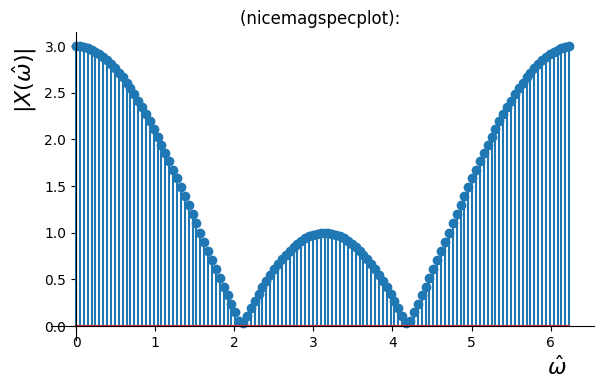

In [3]:
x_n = np.zeros(128)
x_n[:3] = [1, 1, 1]
cap_x_k = np.fft.fft(x_n)

nicemagspecplot(128, cap_x_k, "", [7, 4])

<br>

**Compare this result with the magnitude of the DTFT computed in class room lecture, of which we reproduce the result below. Describe how your result relates to the DTFT magnitude spectrum $|X(e^{j \hat{\omega})}|$.**

![PA.V.1a.png](graphics/PA.V.1a.png)

<br>

<div class="alert alert-block alert-success">
    <b>TODO</b>
</div>

<br>

**Verify the complex conjugated symmetry of the DFT coefficients for $\hat{\omega} > \pi$ relative to the DFT coefficients for $\hat{\omega} < \pi$.**

As an example, verify that the 30-th DFT coefficient, corresponding to digital frequency $\hat{\omega} = 30 . \dfrac{2\pi}{N} = \dfrac{60}{128}\pi \approx 0.469\pi $, is the complex conjugated of the 98-th DFT coefficient, corresponding to $\hat{\omega} = 98 . \frac{2\pi}{N} = \frac{196}{128}\pi \approx 1.531 \pi = \underbrace{-0.469\pi}_{symmetry} + \underbrace{2\pi}_{periodicity}$

<br>

<div class="alert alert-block alert-success">
    <b>TODO... The same...</b>
</div>

<br>

**Compute and plot the phase of the spectrum. Compare this result with the phase of the DTFT computed in class room lecture, of which we reproduce the result here. Describe how your result relates to the DTFT phase spectrum $\arg( X(e^{j \hat{\omega}}))$.**
  
![PA.V.1b.png](graphics/PA.V.1b.png)
    
<br>

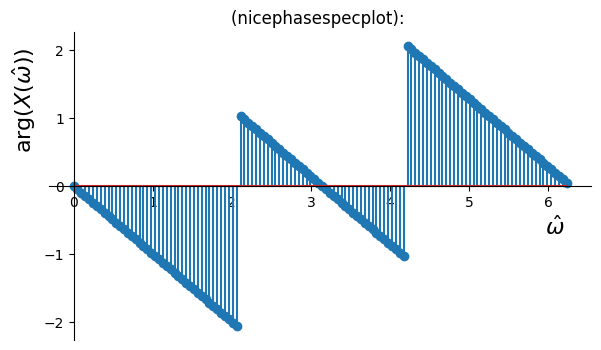

In [4]:
x_n = np.zeros(128)
x_n[:3] = [1, 1, 1]
cap_x_k = np.fft.fft(x_n)

nicephasespecplot(128, cap_x_k, "", [7, 4])

<div class="alert alert-block alert-success">
    <b>TODO... Very similar...</b>
</div>

<br>

Delay the signal $x[n]$ over one time instance, i.e. right-shift the data in the Python vector as so to implement the following input-output relation:

\begin{equation}
    y[n] = \delta[n-1] * x[n] = x[n-1]
\end{equation}

**Create the signal $y[n]$ in a vector of length 128. Compute the DFT of $y[n]$, and plot the magnitude and phase of the spectrum.**

<br>

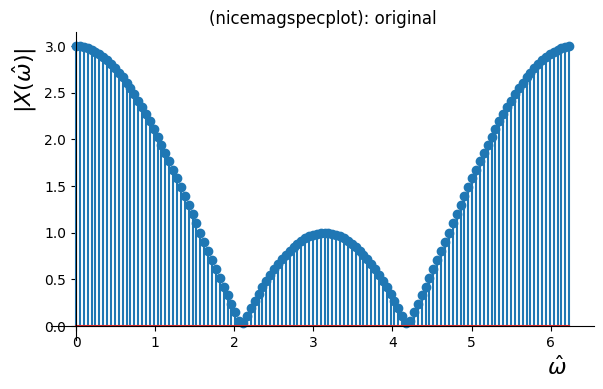

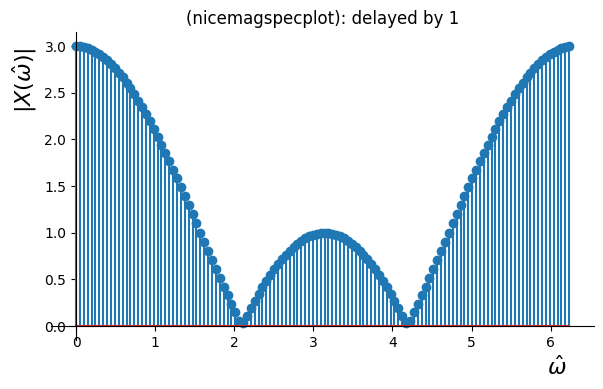

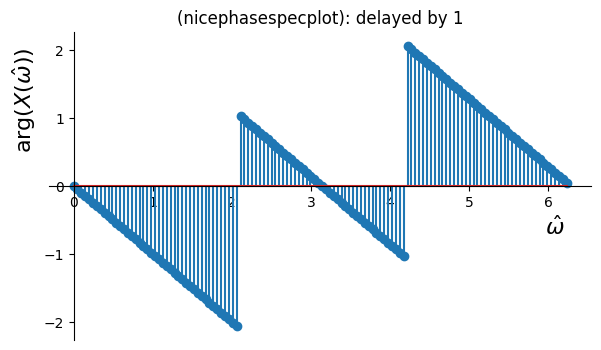

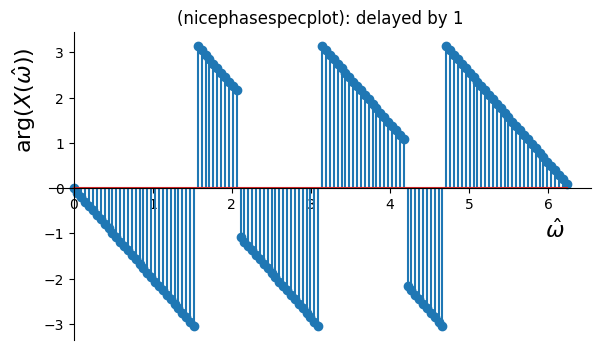

In [5]:
def cap_x_k_of_x_n_delayed_by_d(d):
    x_n = np.zeros(128)
    x_n[:3] = [1, 1, 1]
    h = ([0] * (d)) + [1]
    y_n = np.convolve(h, x_n, mode="full")
    y_n = y_n[:128]
    return y_n.shape[0], np.fft.fft(y_n)

# --- magnitudes ---
nicemagspecplot(*cap_x_k_of_x_n_delayed_by_d(0), "original", [7, 4])
nicemagspecplot(*cap_x_k_of_x_n_delayed_by_d(1), "delayed by 1", [7, 4])

# --- phases ---
nicephasespecplot(*cap_x_k_of_x_n_delayed_by_d(0), "delayed by 1", [7, 4])
nicephasespecplot(*cap_x_k_of_x_n_delayed_by_d(1), "delayed by 1", [7, 4])

<br>

**What value did you use for $y[0]$  and why? What do you observe when comparing the result to the spectrum of $x[n]$?**

<br>

<div class="alert alert-block alert-success">
    <b>Value for y[0] = x[-1] = 0, signal is delayed.</b><br>
    <b>Magnitude spectrum: unchanged.. TODO... Why...</b><br>
    <b>Phase spectrum changed... TODO...</b>
</div>

<br>

**What happens to the phase and magnitude of the spectrum when we delay $x[n]$  over even more time instances (try and show at least two different cases)?**

<br>

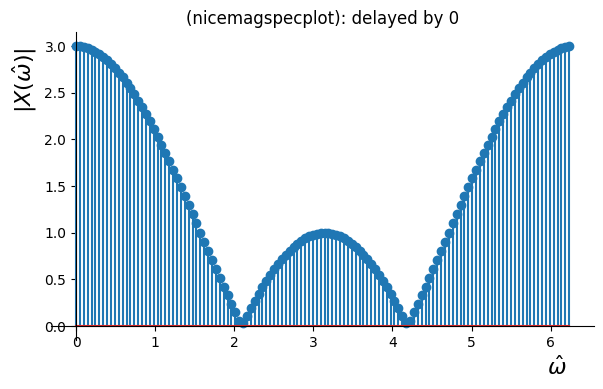

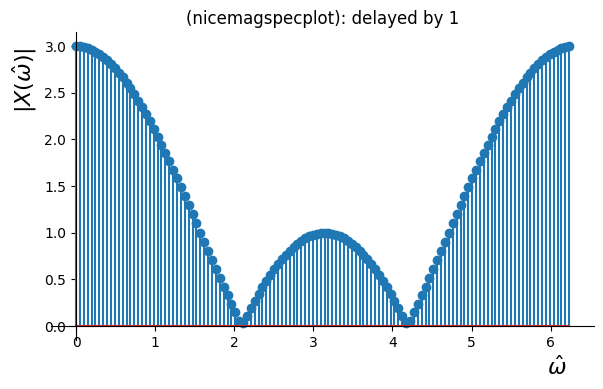

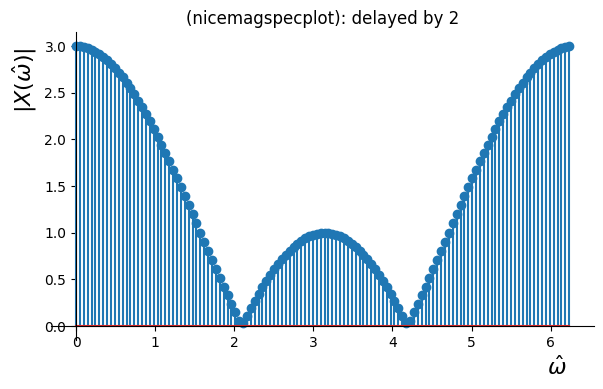

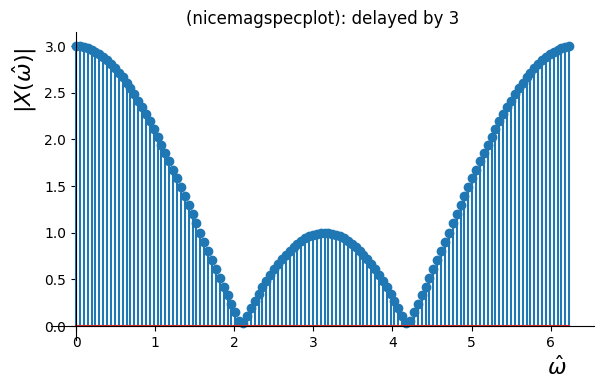

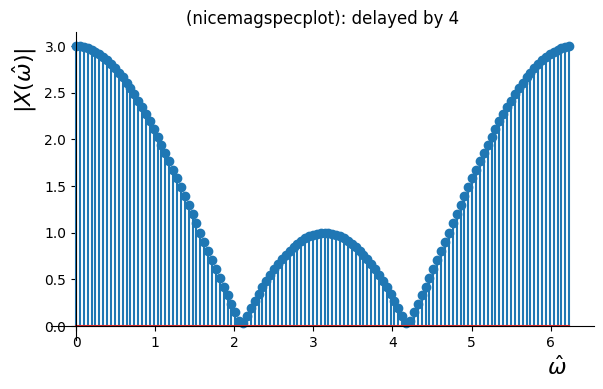

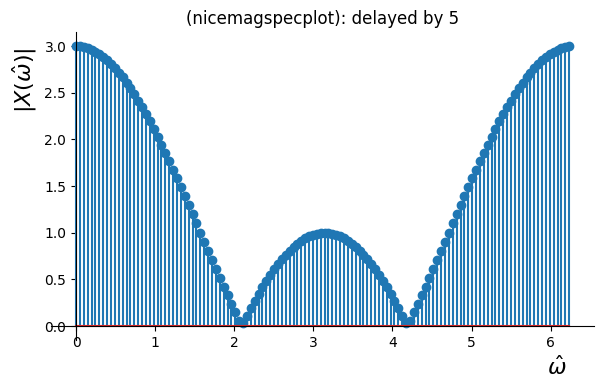

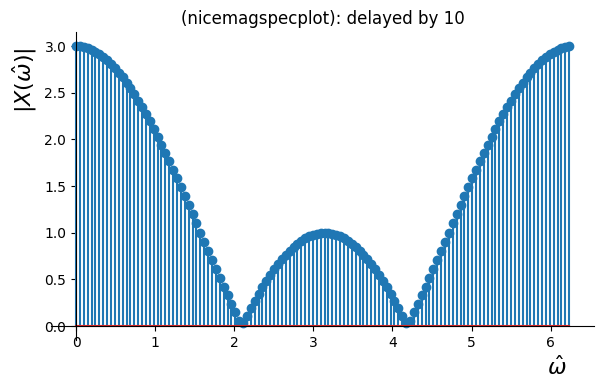

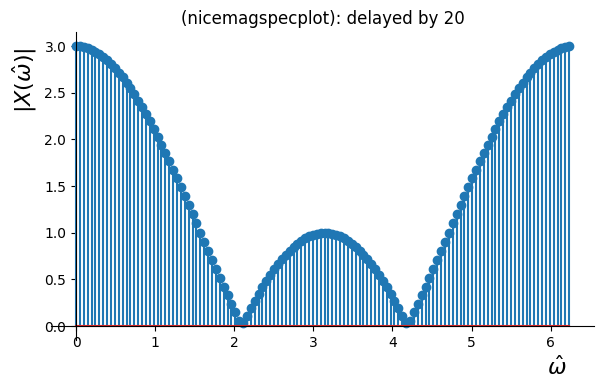

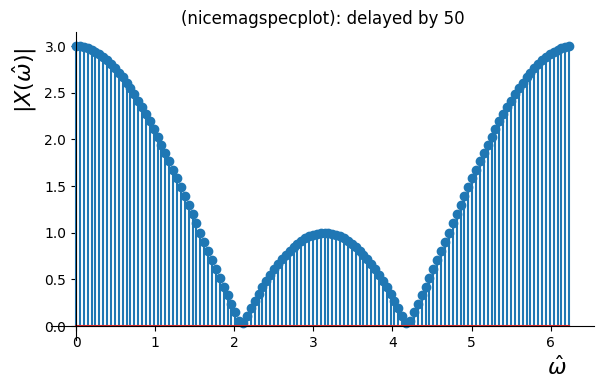



----------




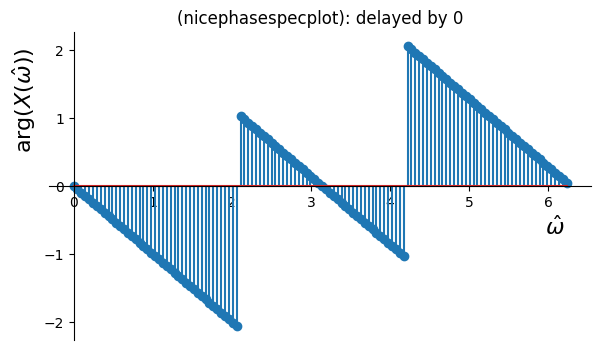

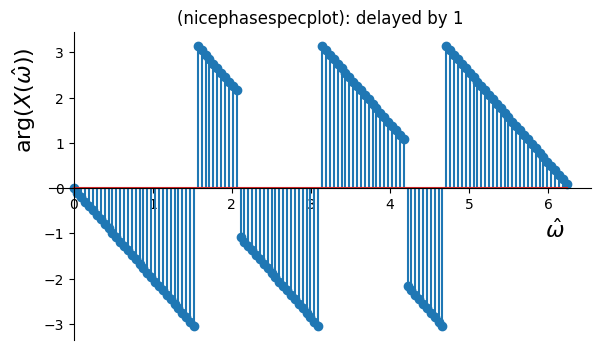

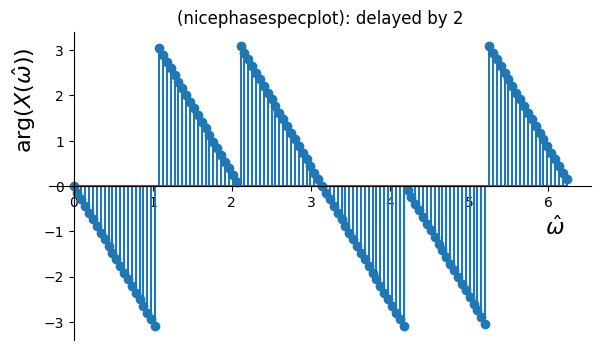

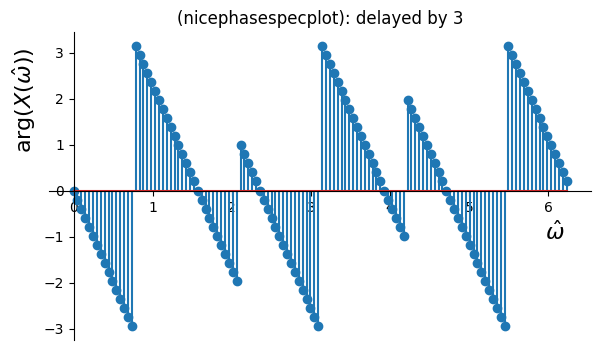

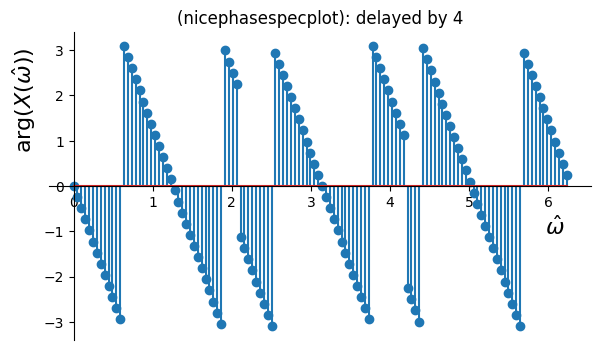

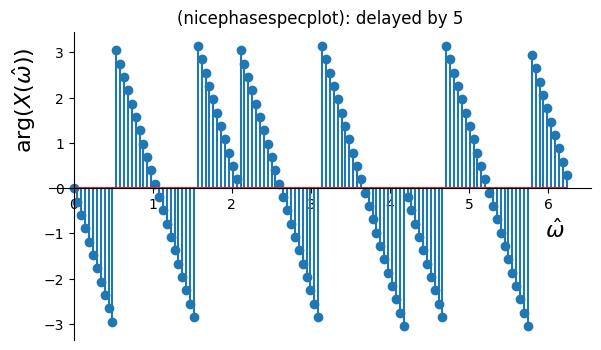

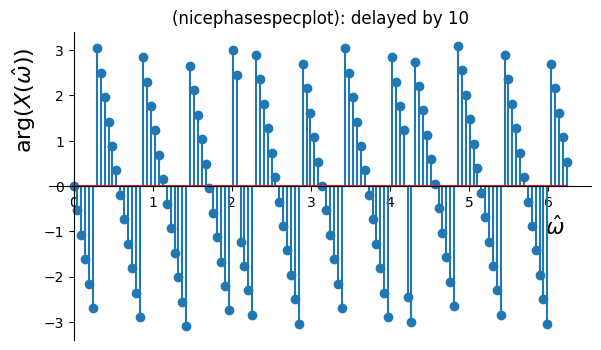

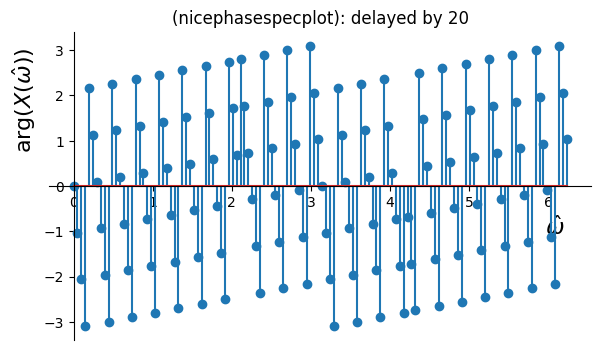

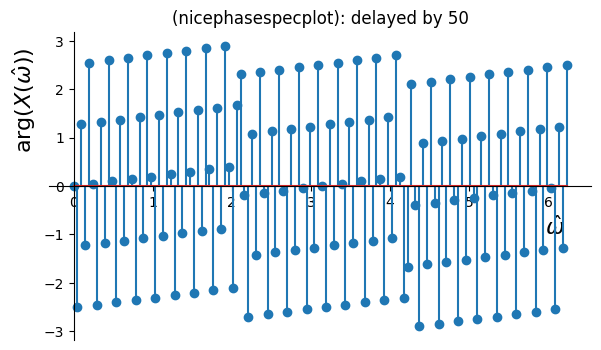

In [12]:
def cap_x_k_of_x_n_delayed_by_d(d):
    x_n = np.zeros(128)
    x_n[:3] = [1, 1, 1]
    h = ([0] * (d)) + [1]
    y_n = np.convolve(h, x_n, mode="full")
    y_n = y_n[:128]
    return y_n.shape[0], np.fft.fft(y_n)

dd = [0, 1, 2, 3, 4, 5, 10, 20, 50]

# --- magnitudes ---
for d in dd:
    nicemagspecplot(*cap_x_k_of_x_n_delayed_by_d(d), f"delayed by {d}", [7, 4])

print("\n\n----------\n\n")

# --- phases ---
for d in dd:
    nicephasespecplot(*cap_x_k_of_x_n_delayed_by_d(d), f"delayed by {d}", [7, 4])

<div class="alert alert-block alert-success">
    <b>TODO...</b>
</div>

<br>

Rather than delaying the signal $x[n]$ over a positive number of time instances (i.e. right shift), we can also delay the signal over a negative number of time instance, i.e. left shift the vector. For the signal considered in this assignment, we obtain:

\begin{equation}
    y[n] = \delta[n+1] * x[n] = x[n+1] = \delta[n+1] + \delta[n] + \delta[n-1].
\end{equation}


For an infinite-length signal to which we can apply the DTFT, this formulation is perfectly fine. But when working with finite length signals in vectors, the question is where to left-shift the first entry in the vector created earlier in this assignment. **In terms of the above equation, what to do with the signal value $\delta[n+1]$? One solution is to just drop this value. Implement this solution, and compute and plot the magnitude and phase spectrum.**

<br>

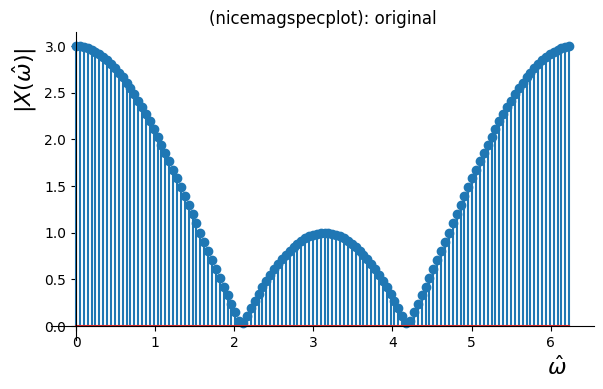

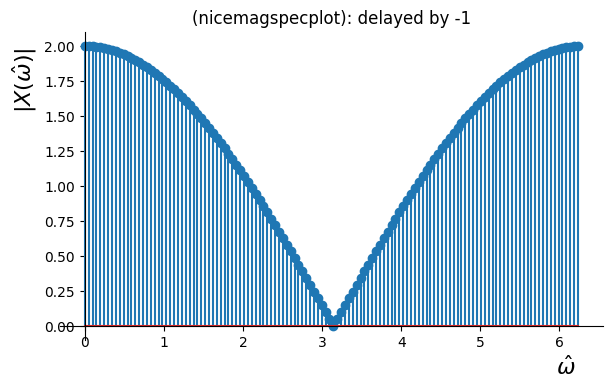

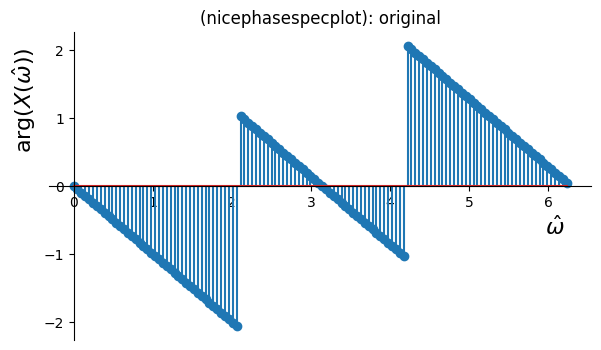

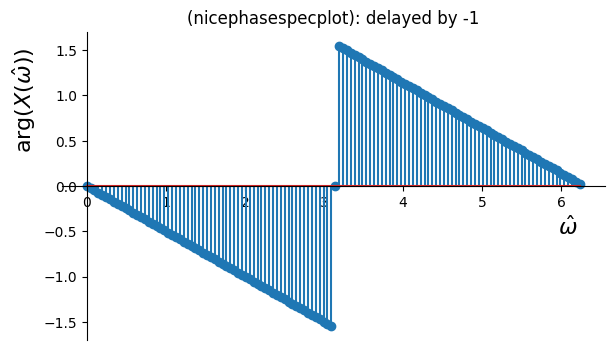

In [7]:
x_n = np.zeros(128)
x_n[:3] = [1, 1, 1]
cap_x_k_of_x_n = np.fft.fft(x_n)

x_n_delayed_by_minus_1 = np.zeros(128)
x_n_delayed_by_minus_1[:2] = [1, 1] # this is effectively delaying by -1 and dropping the first value
cap_x_k_of_x_n_delayed_by_minus_1 = np.fft.fft(x_n_delayed_by_minus_1)

nicemagspecplot(128, cap_x_k_of_x_n, "original", [7, 4])
nicemagspecplot(128, cap_x_k_of_x_n_delayed_by_minus_1, "delayed by -1", [7, 4])

nicephasespecplot(128, cap_x_k_of_x_n, "original", [7, 4])
nicephasespecplot(128, cap_x_k_of_x_n_delayed_by_minus_1, "delayed by -1", [7, 4])



<br>

**Compare the result to the earlier computed spectra of $x[n]$. Explain why the solution you implemented above is not acceptable.**

<br>

<div class="alert alert-block alert-success">
    <b>TODO...</b>
</div>

<br>

Effectively the DFT does not only result in a periodic spectum (over $2\pi$), but it is also implcitly assumes that $x[n]$ is periodic in the time domain over length $N$. Therefore, the correct way of dealing with the  one-sample left-shift of the signal $x[n]$ is to realize that $x[0]$ shifts to the end of the vector that represents $y[n]$, i.e. to $y[127]$. One can easily visualize this by connecting copies of $x[n]$ to its head and tail, and repeating this process. This process of periodic extension, i.e. circularly connecting head and tail of a finite length signal, is always used in combination with DFTs.
    
**Delay the signal  over -1 time instance, effectively left-shifting the signal values by one sample position. Use the above described procedure. Compute the DFT of $y[n]$, and plot the magnitude and phase of the spectrum.**
 
<br>

To double check...
(128,) [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1.]


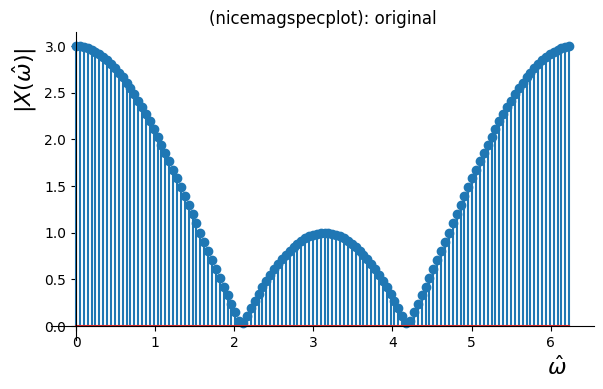

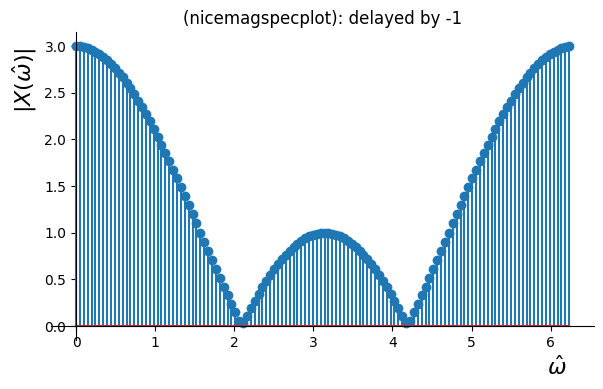

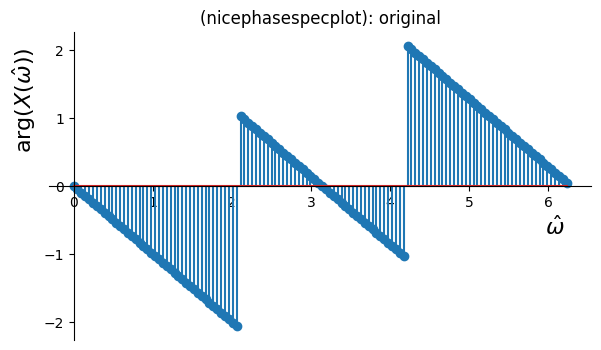

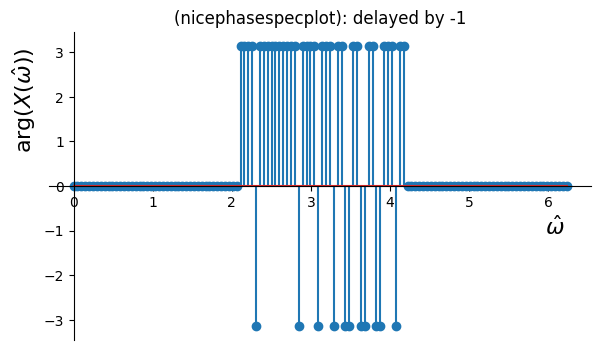

In [8]:
x_n = np.zeros(128)
x_n[:3] = [1, 1, 1]
cap_x_k_of_x_n = np.fft.fft(x_n)

x_n_delayed_by_minus_1 = np.zeros(128)
x_n_delayed_by_minus_1[:3] = [1, 1, 1]
x_n_delayed_by_minus_1 = np.roll(x_n_delayed_by_minus_1, -1)
cap_x_k_of_x_n_delayed_by_minus_1 = np.fft.fft(x_n_delayed_by_minus_1)

print("To double check...")
print(x_n_delayed_by_minus_1.shape, x_n_delayed_by_minus_1)

nicemagspecplot(128, cap_x_k_of_x_n, "original", [7, 4])
nicemagspecplot(128, cap_x_k_of_x_n_delayed_by_minus_1, "delayed by -1", [7, 4])

nicephasespecplot(128, cap_x_k_of_x_n, "original", [7, 4])
nicephasespecplot(128, cap_x_k_of_x_n_delayed_by_minus_1, "delayed by -1", [7, 4])




<br>

**Compare the result to the earlier computed spectra of  $x[n]$. Describe the effect of the periodic extension of the signal.**

<br>

<div class="alert alert-block alert-success">
    <b>TODO</b>
</div>

<hr style="height:3px; border:none; background-color:blue;">

<!---PYTHON ASSIGNMENT VI.2 ---------------------------------------------------------------------->

<div>  
<h3 style="color:blue;"> <u>Python Hands-on Assignment VI.2:  Whistle tone estimation</u></h3>  
    
<br>
<div style="background-color:#c2eafa">
<br>
<b>Completion requirements for this assignment.</b>
<ul>
<li> Show the magnitude spectra for lowest and highest tones in the signal, and explain how you chose the appropriate part of the signal. </li>
<li> Explain how you converted the estimated digital radian frequency to actual frequency in Hz.</li>
<li> Show the plot of the three magnitude spectra in overlay.</li>
</ul>
<hr>
</div>

**Load the audio file** `data/whistle.wav` using the Python command `fs, xx=wv.read('data/whistle.wav')`. **Plot the signal using a proper time axis**, for instance using `nicesignalplot()`. **Listen to the audio file** using the command `display(Audio(xx, rate=fs))`.
</div>

<br>

Sampling frequency f_s=5500Hz


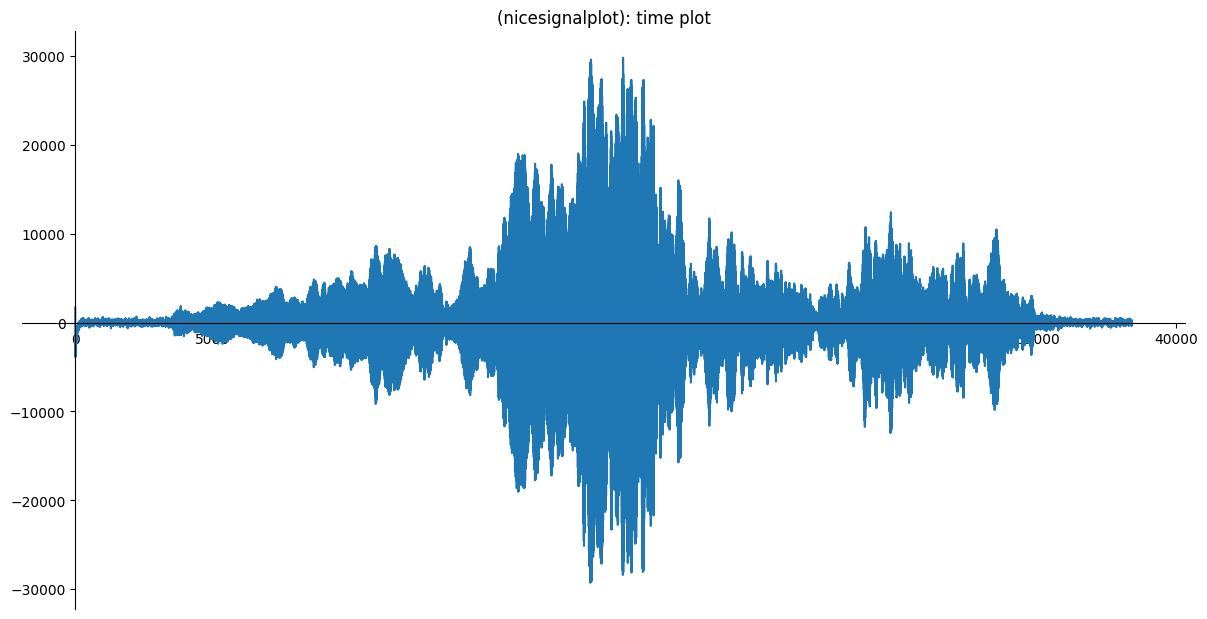

In [9]:
f_s, x_n = wv.read("data/whistle.wav")

display(Audio(x_n, rate=f_s))
print(f"Sampling frequency {f_s=}Hz")
nicesignalplot(np.arange(x_n.shape[0]), x_n, "time plot")

<br>

**What is the sampling frequency of the signal.**

<br>

<div class="alert alert-block alert-success">
    <b>fs=5500Hz</b>
</div>

<br>

**The objective is to estimate the lowest and highest tone in the whistle. To that end, extract (for instance) 512 samples close to the onset of the whistle and put these samples in the vector `xlow`.** Note that the whistle starts only after a delay of around 1 second, hence find out a proper segment of the audio to use. **Similarly extract (for instance) 512 samples close to the end of the whistle and put these samples in the vector `xhigh`. Compute and plot the magnitude of the spectrum of `xlow` and `xhigh`.** Plot the proper digital radial frequencies (rather than DFT coefficient indices) on the horizontal axis of the magnitude spectrum. 
    
<br>

1. Find x_low.


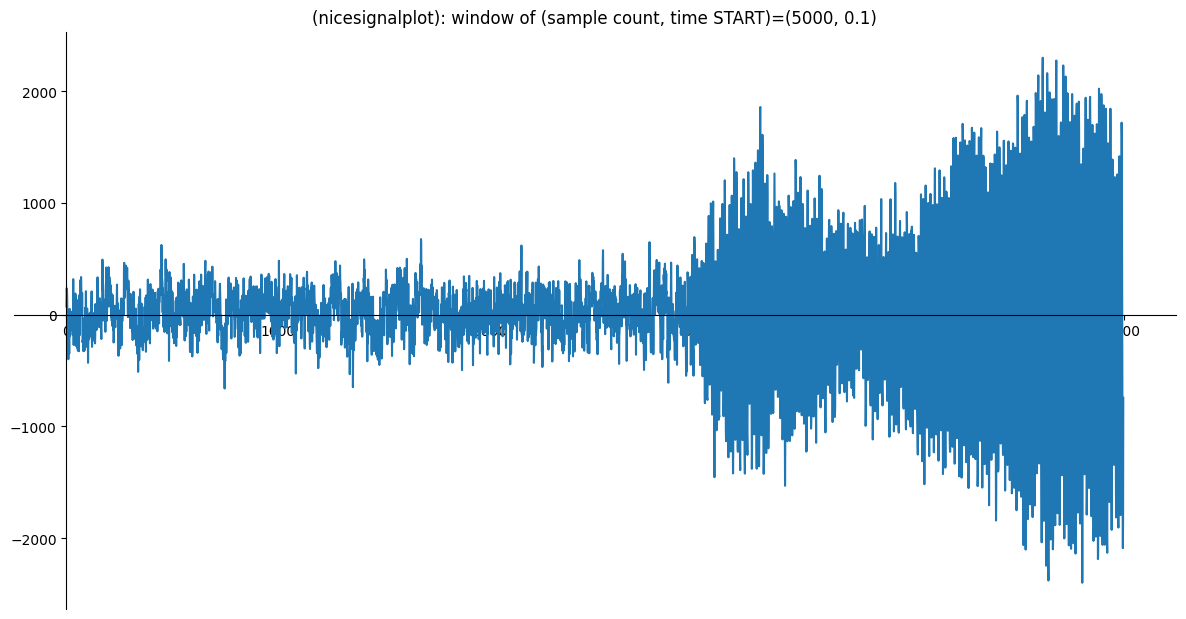

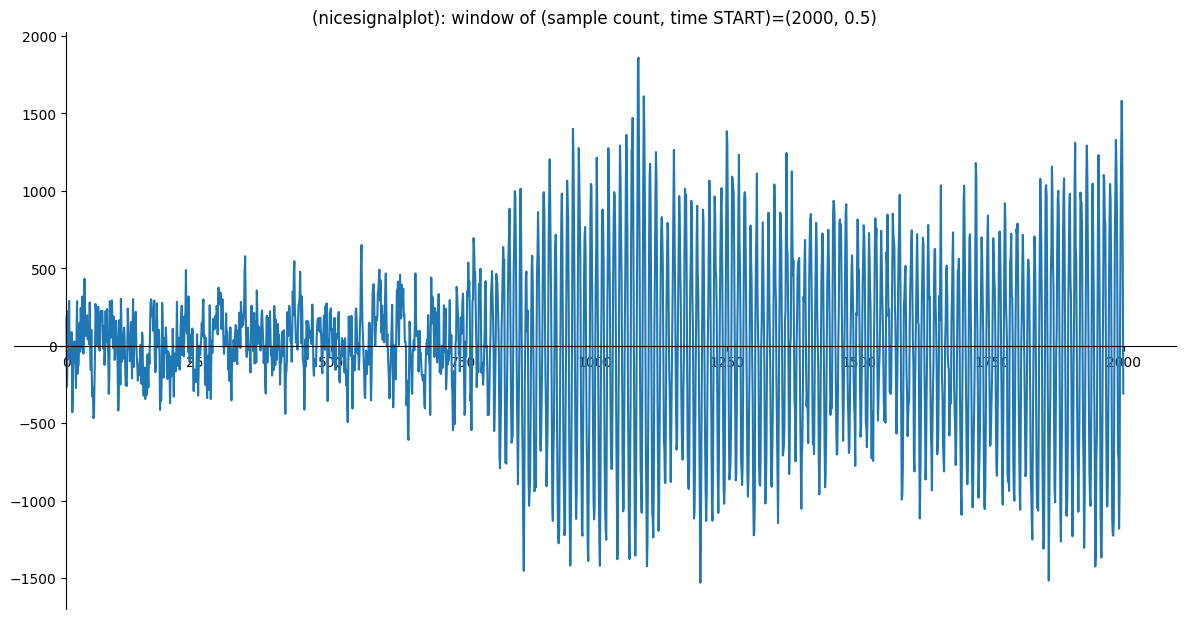

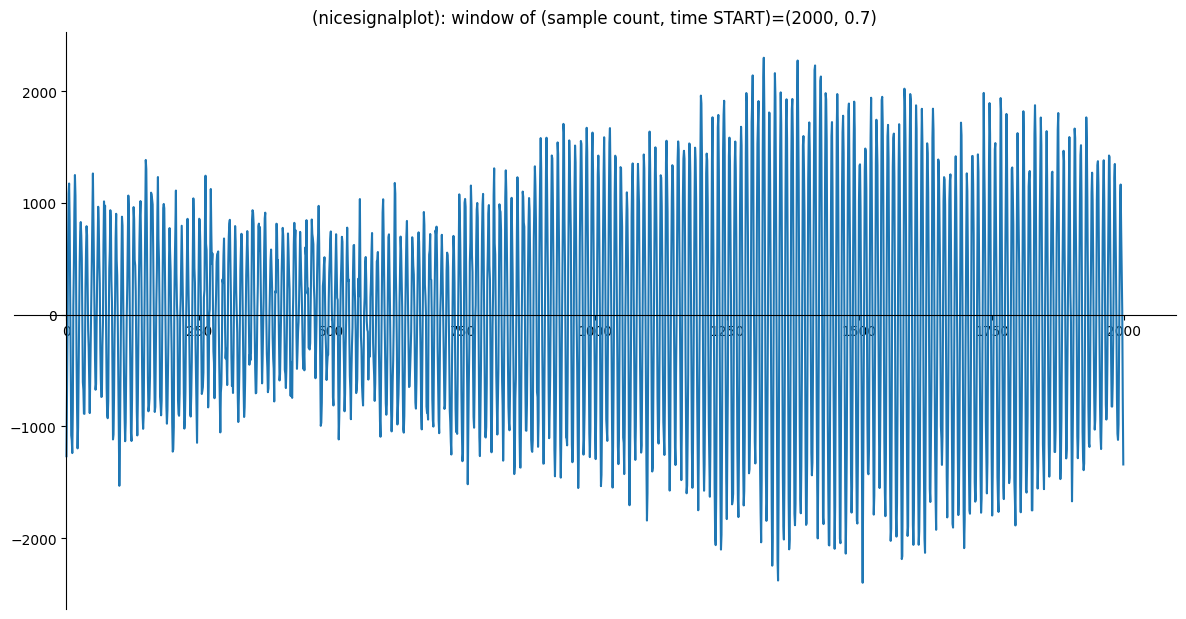

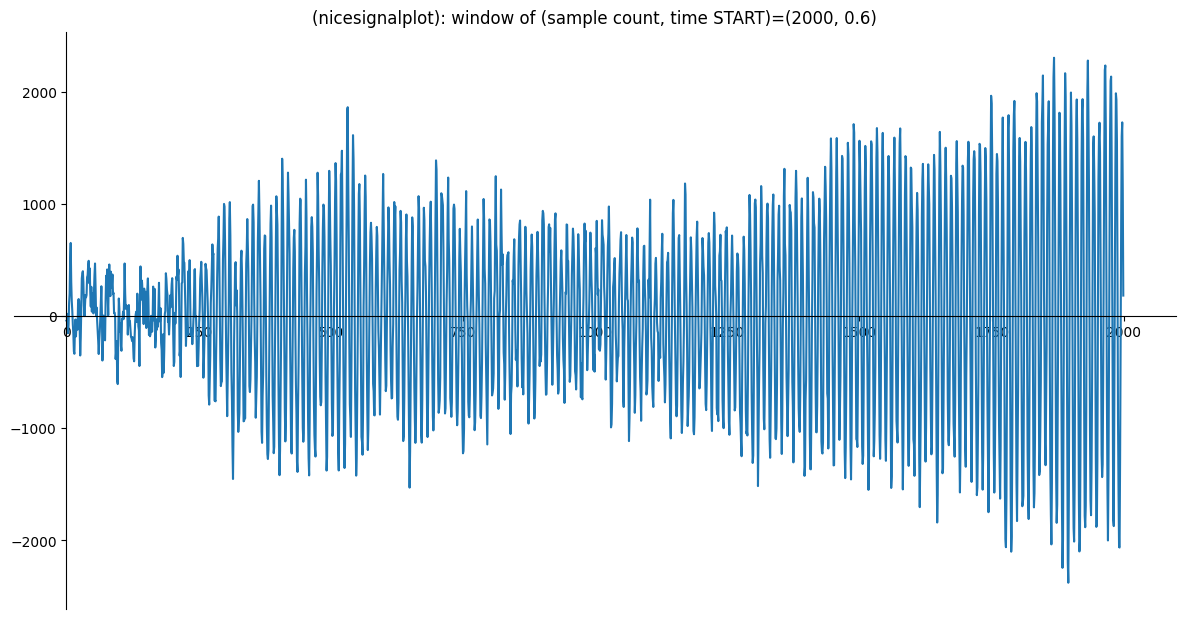

So, t_start=0.6 is a good choice. Let's listen to it.


2. Find x_high.
Calculated audio duration 6.9818181818181815s.


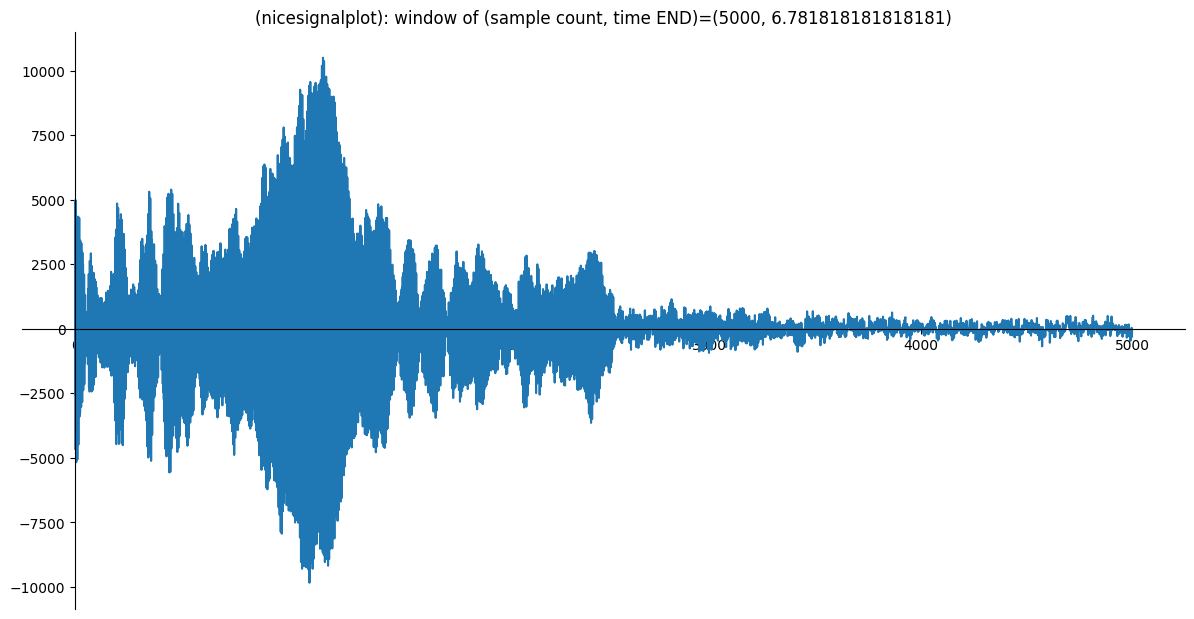

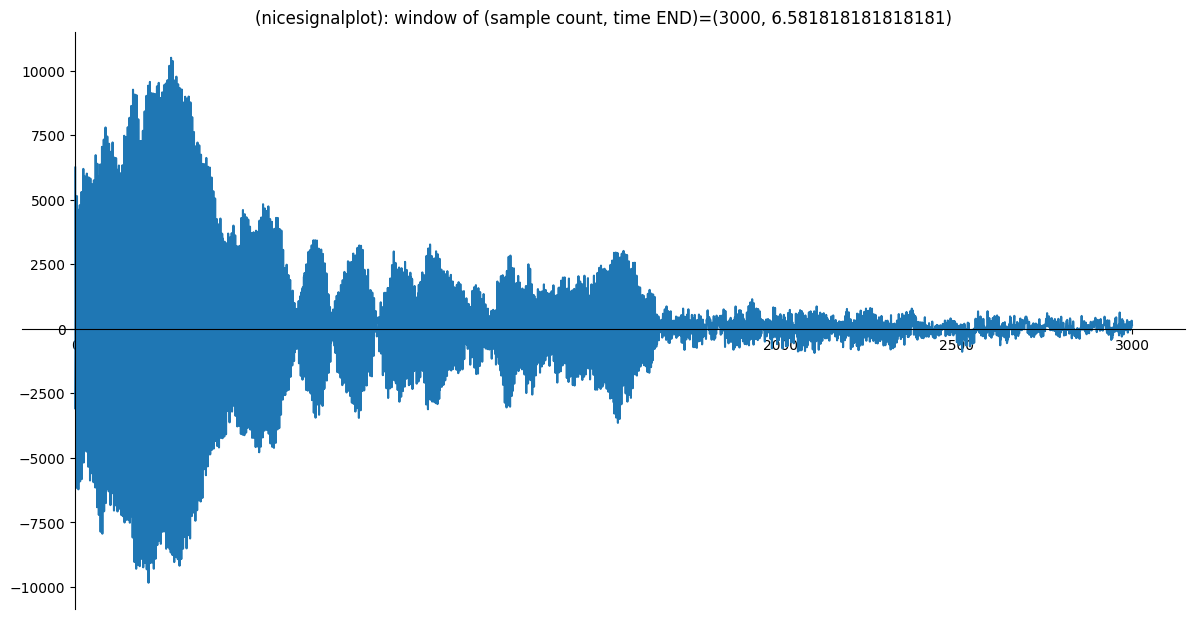

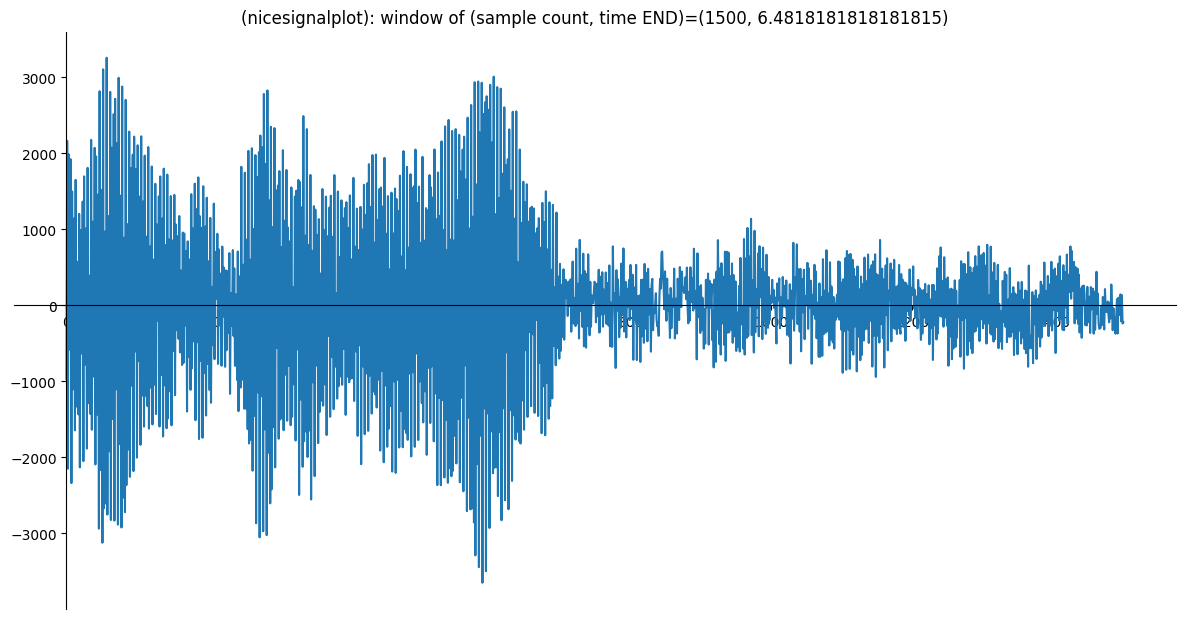

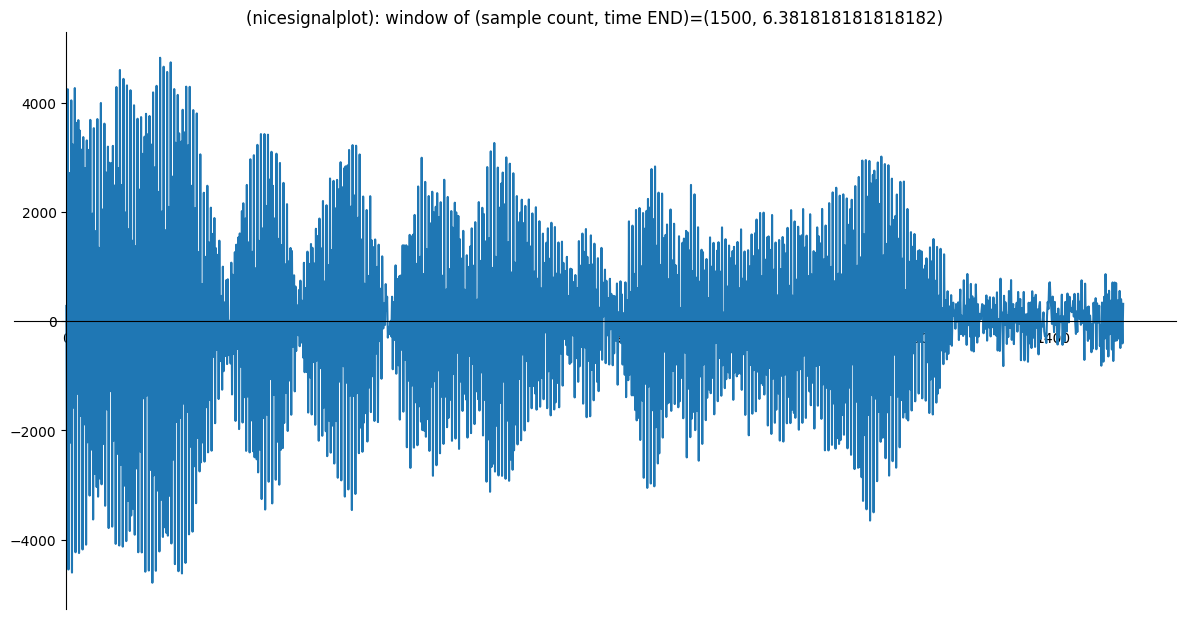

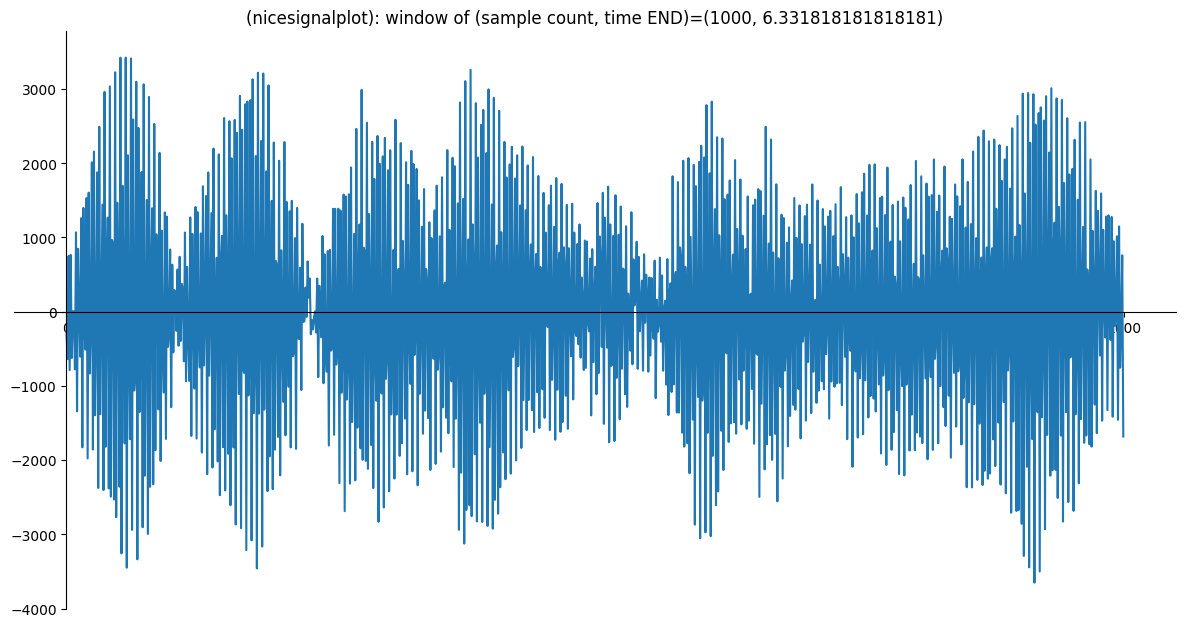

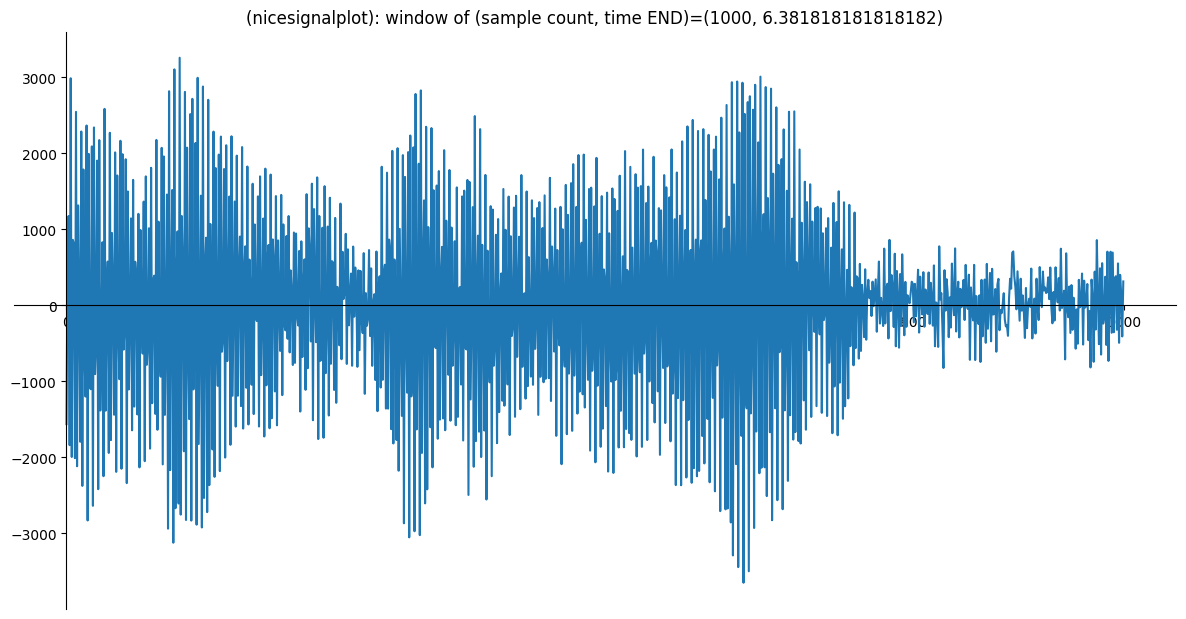

So, t_end=(duration-0.6)=6.381818181818182 is a good choice. Let's listen to it.


3. Magspec plots.
Assert we have exactly 512 samples for both windows.


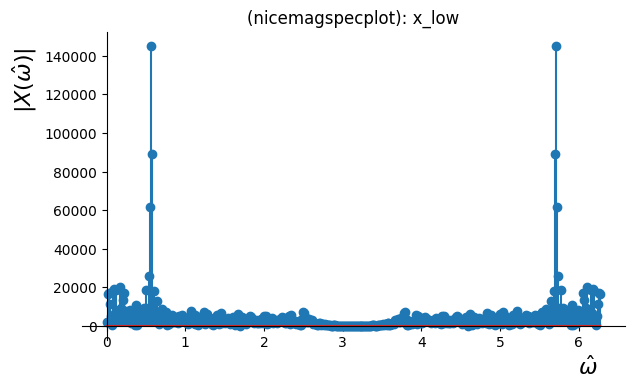

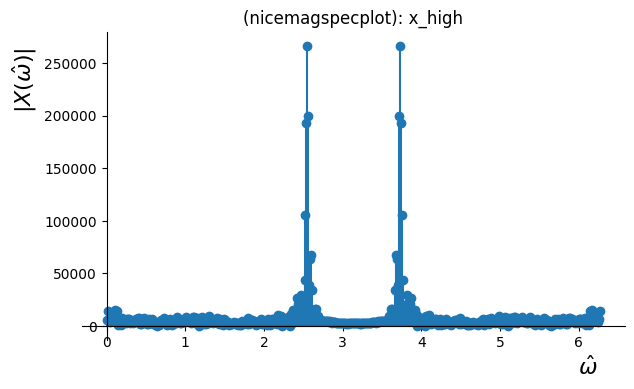

In [13]:
f_s, x_n = wv.read("data/whistle.wav")

def x_n_of_s_samples_of_t_start(s, t):
    start_n = int(np.floor(f_s * t))
    return x_n[start_n:start_n+s]

def x_n_of_s_samples_of_t_end(s, t):
    end_n = int(np.ceil(f_s * t))
    return x_n[end_n-s:end_n]

def plot_window_start(s, t):
    nicesignalplot(np.arange(s), x_n_of_s_samples_of_t_start(s, t), f"window of (sample count, time START)=({s}, {t})")

def plot_window_end(s, t):
    nicesignalplot(np.arange(s), x_n_of_s_samples_of_t_end(s, t), f"window of (sample count, time END)=({s}, {t})")

# ---

print("1. Find x_low.")

plot_window_start(5000, 0.1)
plot_window_start(2000, 0.5)
plot_window_start(2000, 0.7)
plot_window_start(2000, 0.6)

print("So, t_start=0.6 is a good choice. Let's listen to it.")

x_low = x_n_of_s_samples_of_t_start(512, 0.6)
display(Audio(x_low, rate=f_s))

# ---

print("2. Find x_high.")

duration = x_n.shape[0] / f_s # since f_s = s / t
print(f"Calculated audio duration {duration}s.")

plot_window_end(5000, duration - 0.2)
plot_window_end(3000, duration - 0.4)
plot_window_end(1500, duration - 0.5)
plot_window_end(1500, duration - 0.6)
plot_window_end(1000, duration - 0.65)
plot_window_end(1000, duration - 0.6)

print(f"So, t_end=(duration-0.6)={duration-0.6} is a good choice. Let's listen to it.")
x_high = x_n_of_s_samples_of_t_end(512, duration-0.6)
display(Audio(x_high, rate=f_s))

# ---

print("3. Magspec plots.")

print("Assert we have exactly 512 samples for both windows.")
assert x_low.shape[0] == x_high.shape[0] == 512

x_low_spec = np.fft.fft(x_low)
x_high_spec = np.fft.fft(x_high)

nicemagspecplot(512, x_low_spec, "x_low", [7, 4])
nicemagspecplot(512, x_high_spec, "x_high", [7, 4])



<br>

**Please answer <i>all</i> of the following question:** How did you choose which part of the signal to use for the low and high tones? What are the lowest and highest digital frequencies? What are the actual frequencies (in Hz) of the low and the high tones that you hear and how did you calculate this?

<br>

<div class="alert alert-block alert-success">
    1. Through visual and audial exploration, see plots.<br>
    2. TODO...
</div>

<br>

**Verify that you indeed selected the lowest and the highes tone in the whistle signal by plotting the magnitude spectum of the entire whistle signal, and the spectra of `xlow` and `xhigh` in a single figure.** Because plotting with `plt.stem()` is extremely slow for large vectors, use `plt.plot()`. The sample code shows how two example spectra can be plotted into one figure. 

Note: When plotting signals on top of each other, some may appear less visible than others due to scaling. You can scale your signals arbitrarily to make them appear more clearly in the plot.

<br>

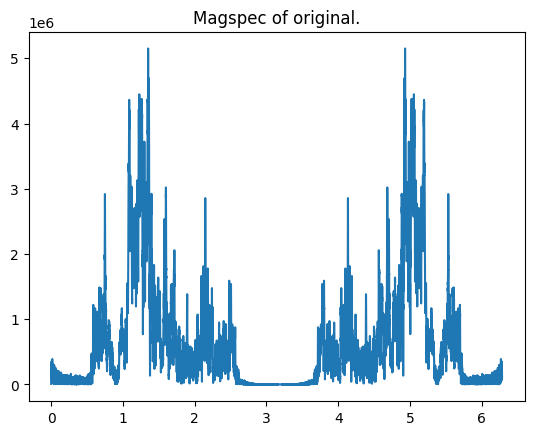

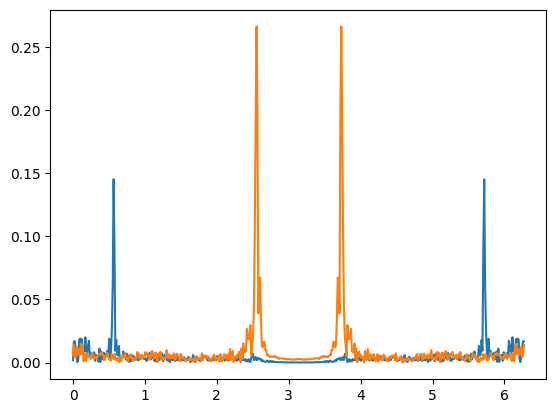

In [15]:
f_s, x_n = wv.read("data/whistle.wav")

cap_x_k = np.fft.fft(x_n)

plt.figure()
plt.plot(np.arange(len(x_n)) * (2 * np.pi / len(x_n)), np.abs(cap_x_k))
plt.title("Magspec of original.")
plt.show()

# --- x_low & x_high ---

Nxx1 = 512
Nxx2 = 512
xx1  = x_low
xx2  = x_high

XX1  = np.abs(np.fft.fft(xx1))
XX2  = np.abs(np.fft.fft(xx2))

plt.figure()
plt.plot(np.arange(len(xx1)) * (2 * np.pi / len(xx1)), np.abs(XX1) / 1e6)
plt.plot(np.arange(len(xx2)) * (2 * np.pi / len(xx2)), np.abs(XX2) / 1e6)
plt.show()